In [108]:
!pip install nltk
!pip install spacy
!pip install seaborn
!pip install matplotlib
!pip install textblob

     |████████████████████████████████| 636 kB 187 kB/s            


In [64]:
import pandas as pd
import re
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from matplotlib.pyplot import figure
figure(figsize=(80, 60), dpi=80)
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
to_update = {'—', '&', 'I', 'p', 'hn', 'el', 'de'}
stopwords.update(to_update) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bartoszskolimowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 6400x4800 with 0 Axes>

In [65]:
biden = pd.read_csv('ProjektZal/JoeBidenTweets.csv')
trump = pd.read_csv('ProjektZal/trump_insult_tweets_2014_to_2021.csv')

In [66]:
start_date = "2019-1-1"
end_date = "2021-1-31"
after_start_date = biden["timestamp"] >= start_date
before_end_date = biden["timestamp"] <= end_date
between_two_dates = after_start_date & before_end_date
biden_dates = biden.loc[between_two_dates]

after_start_date = trump["date"] >= start_date
before_end_date = trump["date"] <= end_date
between_two_dates = after_start_date & before_end_date
trump_dates = trump.loc[between_two_dates]

In [67]:
biden_dates.shape

(3664, 8)

In [68]:
trump_dates.shape

(3388, 5)

In [69]:
biden_data = biden_dates['tweet']
trump_data = trump_dates['tweet']

In [70]:
biden_data.head()

2400    Two years ago, we watched in horror as 58 prec...
2401    President Trump works for the @NRA.\n\nI’ll wo...
2402    The brave people of Hong Kong deserve the full...
2403    One of my favorite parts of debate night has b...
2404    Weapons of war have no place on our streets.\n...
Name: tweet, dtype: object

In [71]:
trump_data.head()

6972    ....a Nancy Pelosi/Chuck Schumer Democrat (Joh...
6973    ....a Nancy Pelosi/Chuck Schumer Democrat (Joh...
6974    ....a Nancy Pelosi/Chuck Schumer Democrat (Joh...
6975    “The congratulatory phone call with the Ukrain...
6976    Why isn’t Congressman Adam Schiff being brough...
Name: tweet, dtype: object

In [72]:
biden_data = biden_data.drop_duplicates()
biden_data.shape

(3663,)

In [73]:
trump_data = trump_data.drop_duplicates()
trump_data.shape

(1901,)

In [74]:
def clean_text(list_of_words):
    temp = re.sub("\s{2,}", " ", list_of_words)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = re.sub("–", "", temp)
    temp = temp.strip()
    return temp

biden_data = [clean_text(i) for i in biden_data]
trump_data = [clean_text(i) for i in trump_data]
print(trump_data)

['a nancy pelosi chuck schumer democrat john bel edwards who does nothing but stymie all of the things we are doing to make america great again don’t be fooled john bel edwards will never be for us early voting has already started', '“the congratulatory phone call with the ukrainian president was perfect unless you heard liddle’ adam schiff’s fraudulently made up version of the call this is just another fake news media together with their partner the democrat party hoax', 'why isn’t congressman adam schiff being brought up on charges for fraudulently making up a statement and reading it to congress as if this statement which was very dishonest and bad for me was directly made by the president of the united states this should never be allowed', 'as i predicted jay powell and the federal reserve have allowed the dollar to get so strong especially relative to all other currencies that our manufacturers are being negatively affected fed rate too high they are their own worst enemies they d

In [75]:
#Function to remove emojis, symbols, pictographs, map symbols and flags from iOS
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

biden_data = [remove_emoji(i) for i in biden_data]
trump_data = [remove_emoji(i) for i in trump_data]

In [76]:
#Function to split tweets into words
biden_all_sentences = []
trump_all_sentences = []
def split_df(df, list_of_words):
    for line in df:
        for word in line.split():
            list_of_words.append(word)

split_df(biden_data, biden_all_sentences)
split_df(trump_data, trump_all_sentences)
print(biden_all_sentences)

['two', 'years', 'ago', 'we', 'watched', 'in', 'horror', 'as', 'precious', 'lives', 'were', 'cut', 'short', 'in', 'the', 'deadliest', 'mass', 'shooting', 'in', 'modern', 'us', 'history', 'as', 'we', 'remember', 'those', 'we', 'lost', 'in', 'las', 'vegas', 'we', 'must', 'honor', 'them', 'with', 'action', 'we', 'cannot', 'let', 'the', 'scourge', 'of', 'gun', 'violence', 'tear', 'our', 'communities', 'apart', 'any', 'longer', 'president', 'trump', 'works', 'for', 'the', 'i’ll', 'work', 'for', 'the', 'american', 'people', 'the', 'brave', 'people', 'of', 'hong', 'kong', 'deserve', 'the', 'full', 'support', 'of', 'the', 'united', 'states', 'as', 'they', 'demand', 'the', 'civil', 'liberties', 'and', 'autonomy', 'promised', 'to', 'them', 'violent', 'suppression', 'is', 'unacceptable', 'the', 'world', 'is', 'watching', 'one', 'of', 'my', 'favorite', 'parts', 'of', 'debate', 'night', 'has', 'become', 'meeting', 'our', 'contest', 'winners', 'from', 'around', 'the', 'country', 'god', 'love', 'ya',

In [77]:
len(biden_all_sentences)

115403

In [78]:
len(trump_all_sentences)

66102

In [79]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

biden_stem = []
for word in biden_all_sentences:
    biden_stem.append(s_stemmer.stem(word))

trump_stem = []
for word in trump_all_sentences:
    trump_stem.append(s_stemmer.stem(word))



In [80]:
#Removing all Stop Words
biden_stopwords = []
trump_stopwords = []

for word in biden_stem:
    if word not in stopwords:
        biden_stopwords.append(word)
        
for word in trump_stem:
    if word not in stopwords:
        trump_stopwords.append(word)


In [81]:
len(biden_stopwords)

59707

In [82]:
len(trump_stopwords)

36501

In [83]:
print(biden_stopwords)

['two', 'year', 'ago', 'watch', 'horror', 'precious', 'live', 'cut', 'short', 'deadliest', 'mass', 'shoot', 'modern', 'us', 'histori', 'rememb', 'lost', 'las', 'vega', 'must', 'honor', 'action', 'cannot', 'let', 'scourg', 'gun', 'violenc', 'tear', 'communiti', 'apart', 'ani', 'longer', 'presid', 'trump', 'work', "i'll", 'work', 'american', 'peopl', 'brave', 'peopl', 'hong', 'kong', 'deserv', 'full', 'support', 'unit', 'state', 'demand', 'civil', 'liberti', 'autonomi', 'promis', 'violent', 'suppress', 'unaccept', 'world', 'watch', 'one', 'favorit', 'part', 'debat', 'night', 'becom', 'meet', 'contest', 'winner', 'around', 'countri', 'god', 'love', 'ya', 'joann', 'thank', 'come', 'houston', 'enter', 'chanc', 'join', 'next', 'democrat', 'debat', 'weapon', 'war', 'place', 'street', 'must', 'take', 'ban', 'assault', 'weapon', 'high', 'capac', 'magazin', "i'v", 'done', 'befor', "i'll", 'white', 'hous', 'presid', 'trump', 'ask', 'foreign', 'govern', 'interfer', 'elect', 'spend', 'million', 'at

In [84]:
df_biden = pd.DataFrame(biden_stopwords)
df_trump = pd.DataFrame(trump_stopwords)

df_biden_matrix = df_biden.copy()
df_trump_matrix = df_trump.copy()

df_biden = df_biden[0].value_counts()
df_trump = df_trump[0].value_counts()
#df_biden
#df_trump

In [85]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_biden

trump       1115
presid      1033
donald       719
american     629
need         569
            ... 
lash           1
you—and        1
xenophob       1
loweri         1
was—and        1
Name: 0, Length: 4734, dtype: int64

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


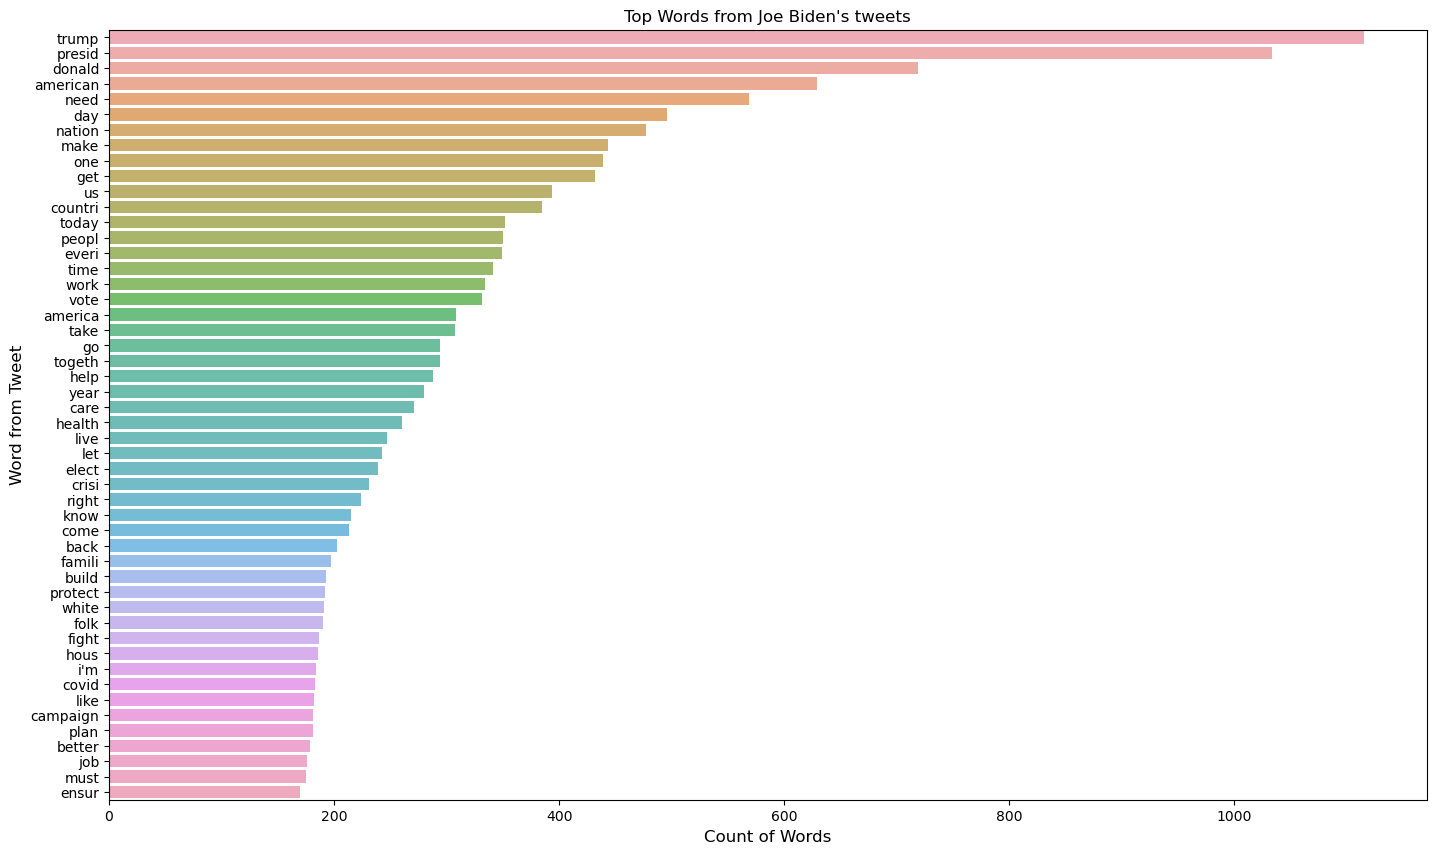

In [87]:
df_biden_original = df_biden.copy()
df_biden = df_biden[:50,]
plt.figure(figsize=(17,10))
sns.barplot(df_biden.values, df_biden.index, alpha=0.8)
plt.title("Top Words from Joe Biden's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


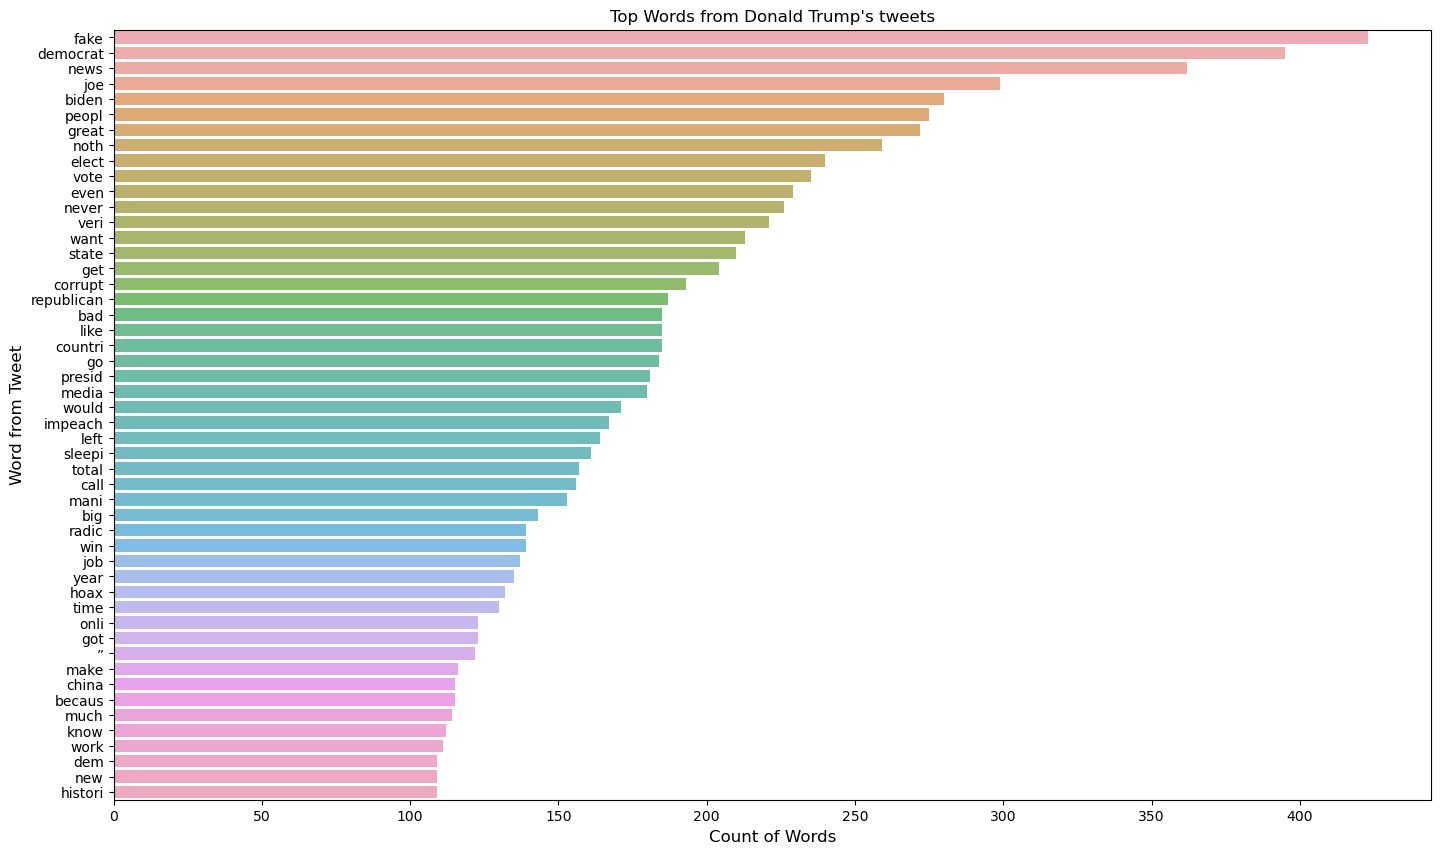

In [88]:
df_trump_original = df_trump.copy()
df_trump = df_trump[:50,]
plt.figure(figsize=(17,10))
sns.barplot(df_trump.values, df_trump.index, alpha=0.8)
plt.title("Top Words from Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [89]:
#tabA_bez_tabB = [el for el in tabA if el not in tabB]

In [90]:
df_biden_original = df_biden_original.to_frame()
df_trump_original = df_trump_original.to_frame()

In [91]:
df_biden_original

,0
trump,1115
presid,1033
donald,719
american,629
need,569
...,...
lash,1
you—and,1
xenophob,1
loweri,1


In [92]:
df_biden_original = df_biden_original.reset_index()
df_biden_original.rename(columns={0: 'count', 'index':'words'}, inplace=True)

df_trump_original = df_trump_original.reset_index()
df_trump_original.rename(columns={0: 'count', 'index':'words'}, inplace=True)

In [93]:
same_words = df_biden_original.merge(df_trump_original, on='words', how='inner')


In [94]:
same_words['sum'] = same_words['count_x'] + same_words['count_y']
same_words = same_words.sort_values(by=['sum'], ascending=False)

In [95]:
same_words.head(50)

,words,count_x,count_y,sum
1,presid,1033,181,1214
0,trump,1115,96,1211
3,american,629,105,734
2,donald,719,11,730
9,get,432,204,636
13,peopl,350,275,625
4,need,569,39,608
11,countri,385,185,570
17,vote,331,235,566
7,make,443,116,559


/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


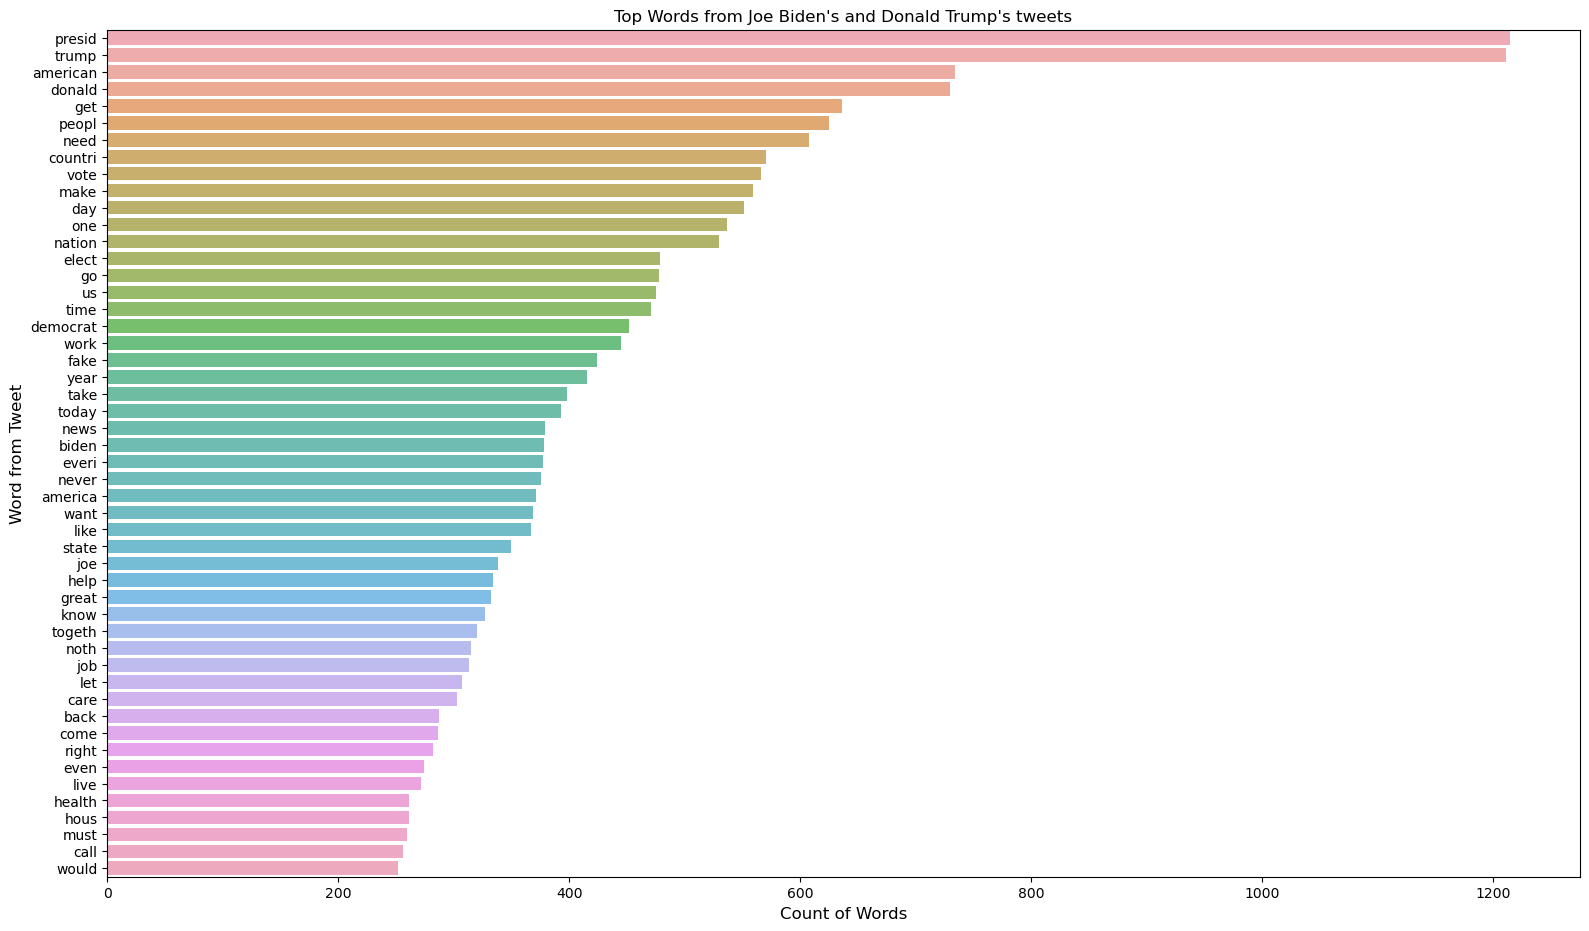

In [96]:
same_words = same_words.head(50)
plt.figure(figsize=(19,11))
sns.barplot(same_words['sum'], same_words['words'], alpha=0.8)
plt.title("Top Words from Joe Biden's and Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [97]:
df=pd.merge(df_biden_original,df_trump_original,on='words',how="outer",indicator=True)

In [98]:
df_biden_only=df[df['_merge']=='left_only']

In [99]:
df_biden_only

,words,count_x,count_y,_merge
38,folk,190.0,NaN,left_only
53,chip,160.0,NaN,left_only
80,climat,127.0,NaN,left_only
133,afford,85.0,NaN,left_only
184,stake,69.0,NaN,left_only
...,...,...,...,...
4729,lash,1.0,NaN,left_only
4730,you—and,1.0,NaN,left_only
4731,xenophob,1.0,NaN,left_only
4732,loweri,1.0,NaN,left_only


/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


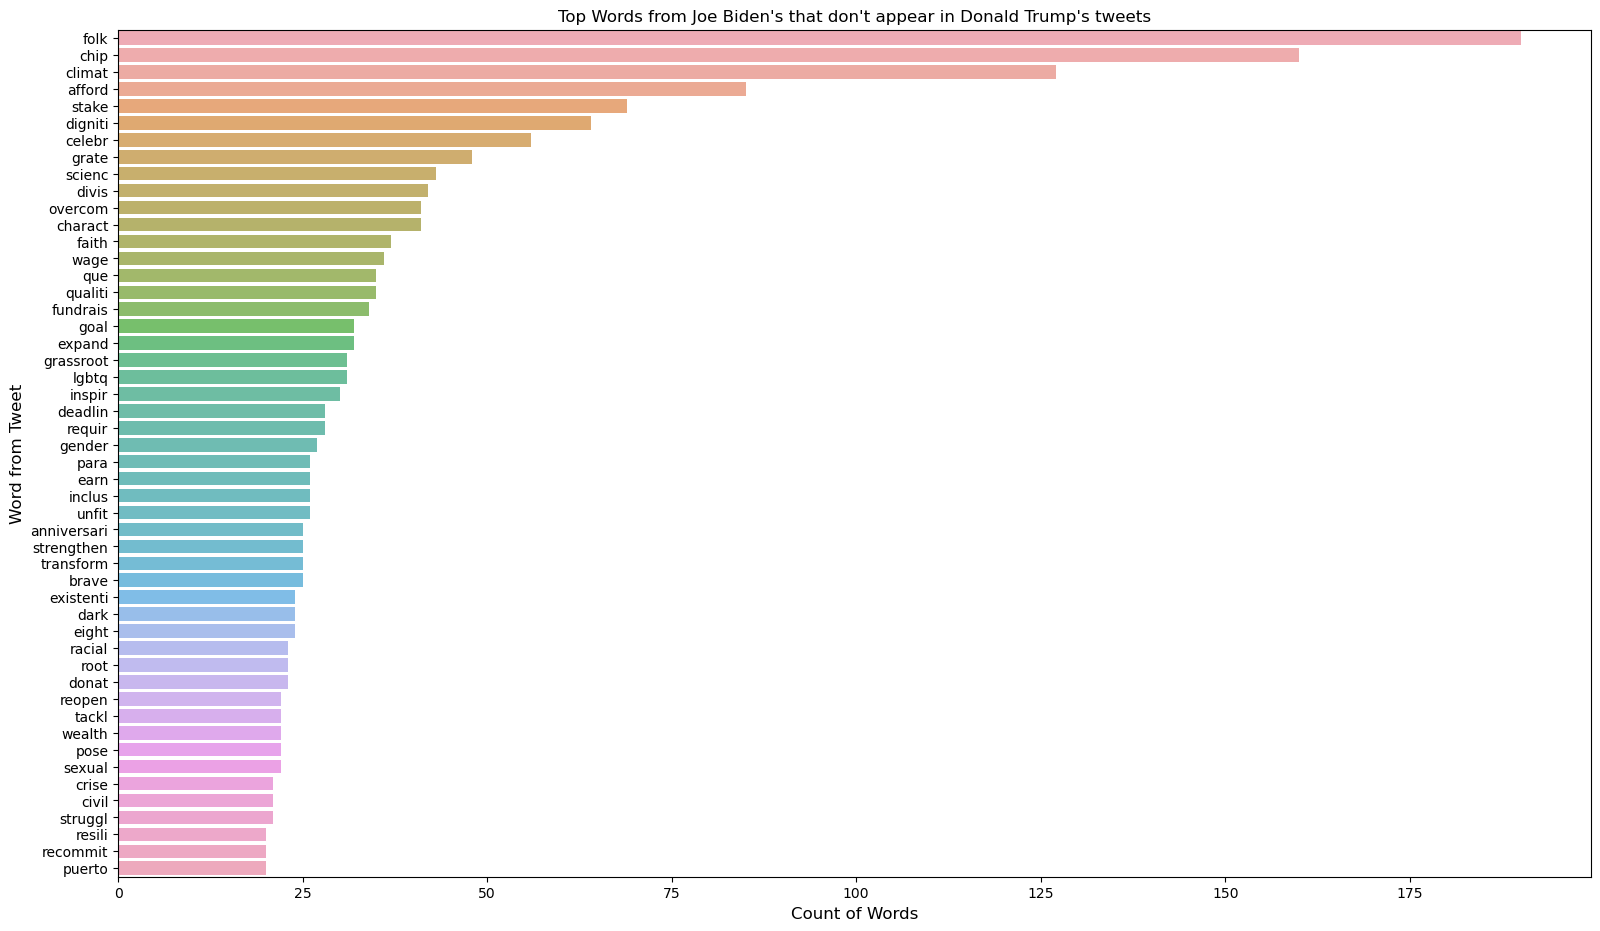

In [100]:
df_biden_only = df_biden_only.head(50)
plt.figure(figsize=(19,11))
sns.barplot(df_biden_only['count_x'], df_biden_only['words'], alpha=0.8)
plt.title("Top Words from Joe Biden's that don't appear in Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [101]:
df=pd.merge(df_trump_original,df_biden_original,on='words',how="outer",indicator=True)
df_trump_only=df[df['_merge']=='left_only']

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


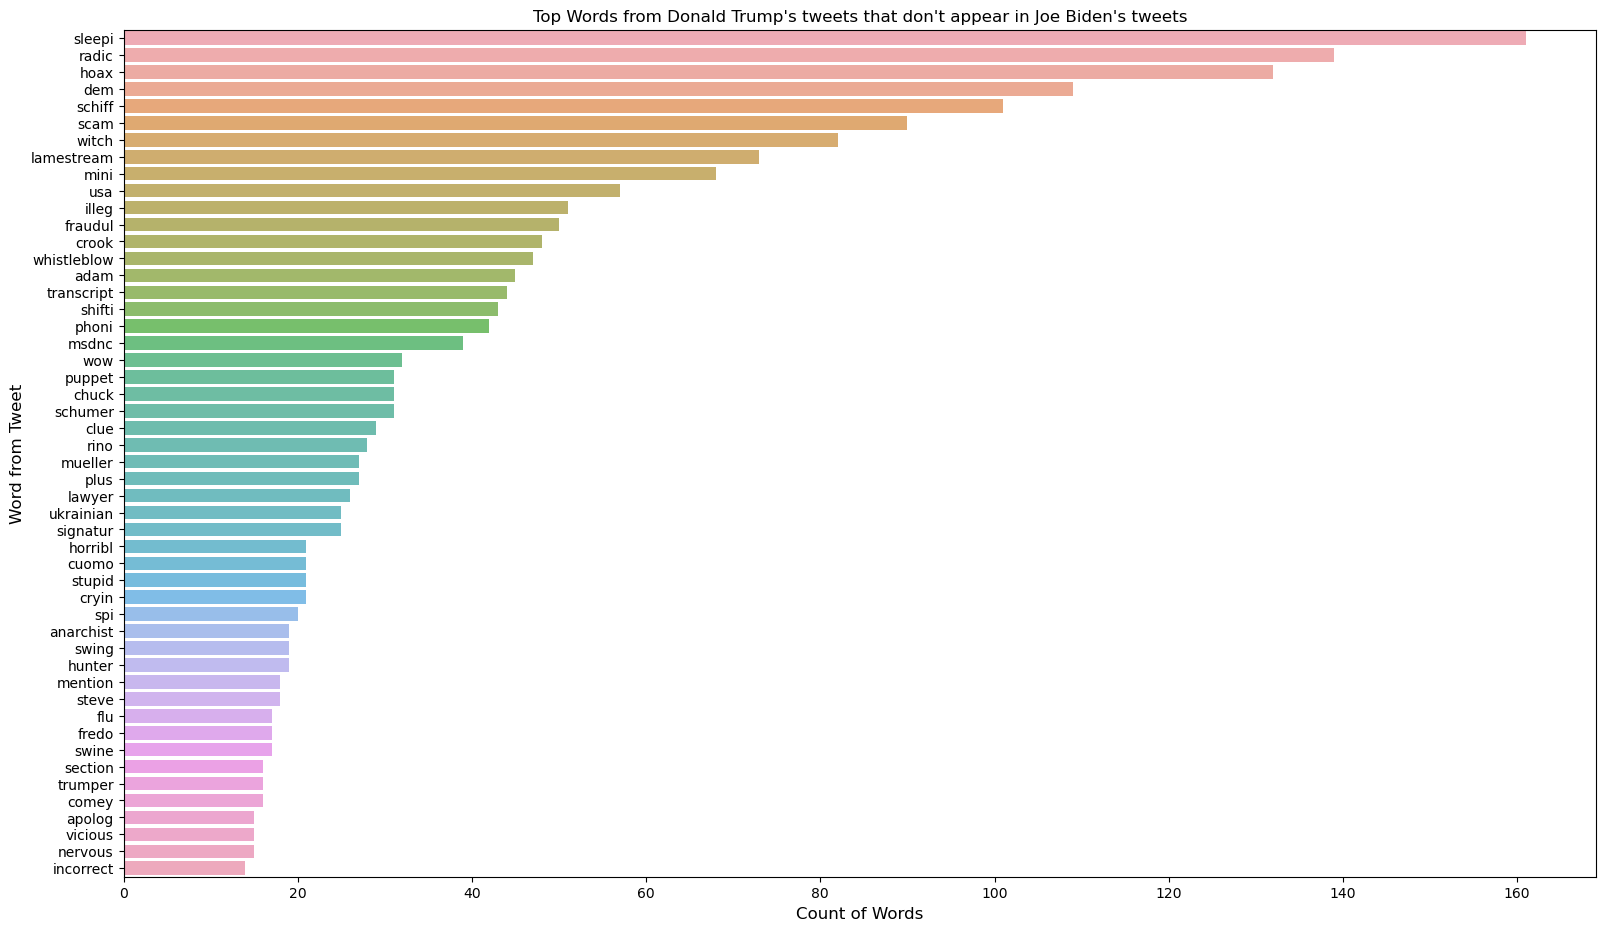

In [102]:
df_trump_only = df_trump_only.head(50)
plt.figure(figsize=(19,11))
sns.barplot(df_trump_only['count_x'], df_trump_only['words'], alpha=0.8)
plt.title("Top Words from Donald Trump's tweets that don't appear in Joe Biden's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [117]:
#Sentiment analysis 

from textblob import TextBlob
biden_data[0]
trump_data[0]

'a nancy pelosi chuck schumer democrat john bel edwards who does nothing but stymie all of the things we are doing to make america great again don’t be fooled john bel edwards will never be for us early voting has already started'

In [118]:
biden_data_df = pd.DataFrame(biden_data)
trump_data_df = pd.DataFrame(trump_data)

In [119]:
biden_data_df

,0
0,two years ago we watched in horror as precious...
1,president trump works for the i’ll work for th...
2,the brave people of hong kong deserve the full...
3,one of my favorite parts of debate night has b...
4,weapons of war have no place on our streets we...
...,...
3658,as president i’ll build an economy that reward...
3659,let’s put dogs back in the white house
3660,we have in our hands the ultimate power the po...
3661,we need to build bridges not walls open our ar...


Text(0.5, 1.0, "Biden's tweets sentimental analysis")

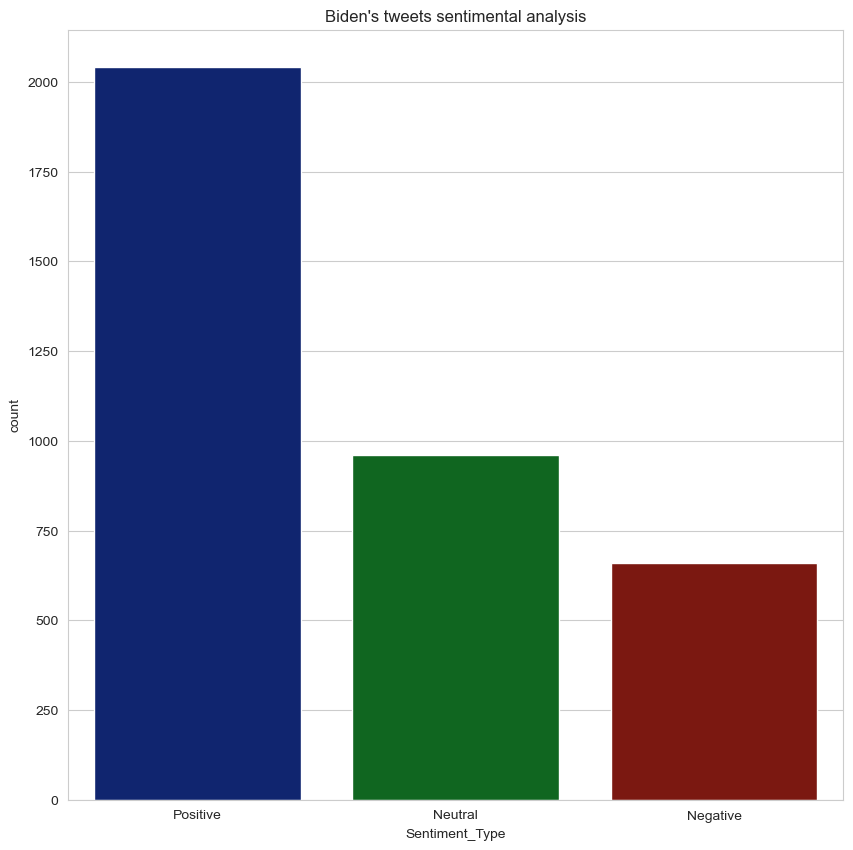

In [129]:
bloblist_desc = list()

df_usa_descr_str=biden_data_df[0]
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
plt.style.use('seaborn-dark-palette')
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)
ax.set_title("Biden's tweets sentimental analysis")

Text(0.5, 1.0, "Trump's tweets sentimental analysis")

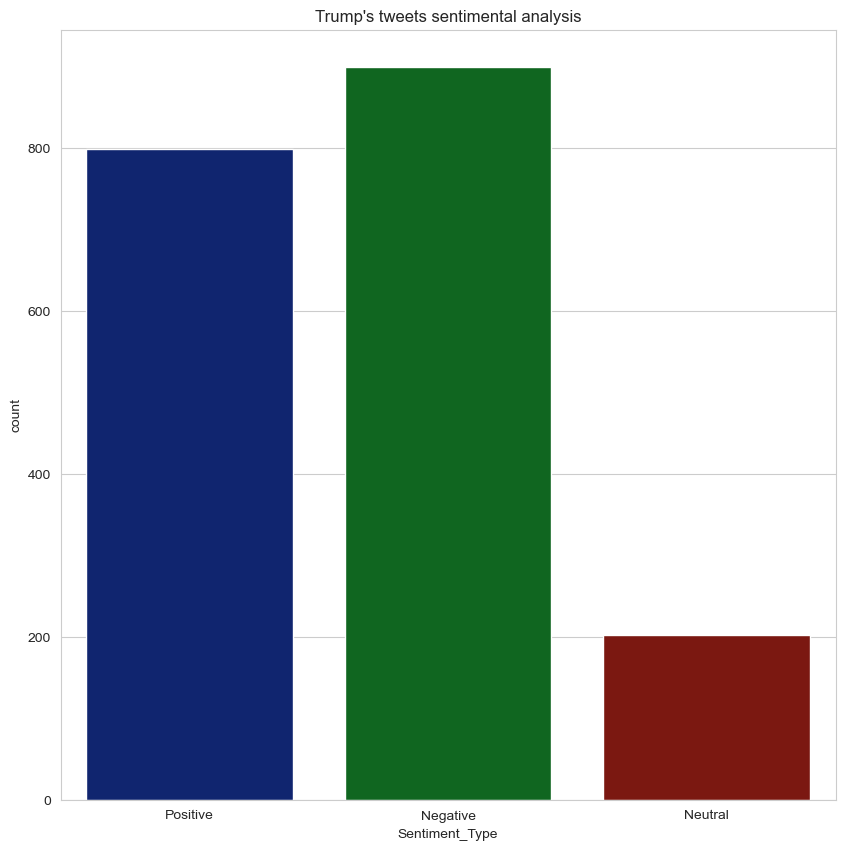

In [130]:
bloblist_desc = list()

df_usa_descr_str=trump_data_df[0]
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
plt.style.use('seaborn-dark-palette')
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)
ax.set_title("Trump's tweets sentimental analysis")